<a href="https://colab.research.google.com/github/ltoosaint24/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/Loveline_Toussaint__DS_Unit_1_Sprint_Challenge_2_Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 2

## Exploring Data, Testing Hypotheses

In this sprint challenge you will look at a dataset of Echocardiograms

<https://archive.ics.uci.edu/ml/datasets/Echocardiogram>

Attribute Information:

1. survival -- the number of months patient survived (has survived, if patient is still alive). Because all the patients had their heart attacks at different times, it is possible that some patients have survived less than one year but they are still alive. Check the second variable to confirm this. Such patients cannot be used for the prediction task mentioned above.
2. still-alive -- a binary variable. 0=dead at end of survival period, 1 means still alive
3. age-at-heart-attack -- age in years when heart attack occurred
4. pericardial-effusion -- binary. Pericardial effusion is fluid around the heart. 0=no fluid, 1=fluid
5. fractional-shortening -- a measure of contracility around the heart lower numbers are increasingly abnormal
6. epss -- E-point septal separation, another measure of contractility. Larger numbers are increasingly abnormal.
7. lvdd -- left ventricular end-diastolic dimension. This is a measure of the size of the heart at end-diastole. Large hearts tend to be sick hearts.
8. wall-motion-score -- a measure of how the segments of the left ventricle are moving
9. wall-motion-index -- equals wall-motion-score divided by number of segments seen. Usually 12-13 segments are seen in an echocardiogram. Use this variable INSTEAD of the wall motion score.
10. mult -- a derivate var which can be ignored
11. name -- the name of the patient (I have replaced them with "name")
12. group -- meaningless, ignore it
13. alive-at-1 -- Boolean-valued. Derived from the first two attributes. 0 means patient was either dead after 1 year or had been followed for less than 1 year. 1 means patient was alive at 1 year.

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- UCI says there should be missing data - check, and if necessary change the data so pandas recognizes it as na
- Make sure that the loaded features are of the types described above (continuous values should be treated as float), and correct as necessary

This is review, but skills that you'll use at the start of any data exploration. Further, you may have to do some investigation to figure out which file to load from - that is part of the puzzle.

In [1]:
!wget 'https://archive.ics.uci.edu/ml/datasets/Echocardiogram/echocardiogram.data'

--2020-08-03 04:05:33--  https://archive.ics.uci.edu/ml/datasets/Echocardiogram/echocardiogram.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘echocardiogram.data’

echocardiogram.data     [ <=>                ]  13.22K  --.-KB/s    in 0.1s    

2020-08-03 04:05:34 (103 KB/s) - ‘echocardiogram.data’ saved [13542]



In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as numy
from scipy.stats import ttest_1samp, ttest_ind
from zipfile  import ZipFile






In [41]:
#Being there was 
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/echocardiogram/echocardiogram.data"

colum_header = [ 'survival', 'still-alive','age-at-heart-attack','pericardial-effusion','fractional-shortening','epss',
'lvdd','wall-motion-score','wall-motion-index','mult','name','group','alive-at-1']
innr = pd.read_csv(url, error_bad_lines=False, 
                   header=None,
                   names =colum_header,)

In [42]:
innr

,survival,still-alive,age-at-heart-attack,pericardial-effusion,fractional-shortening,epss,lvdd,wall-motion-score,wall-motion-index,mult,name,group,alive-at-1
0,11,0,71,0,0.260,9,4.600,14,1,1,name,1,0
1,19,0,72,0,0.380,6,4.100,14,1.700,0.588,name,1,0
2,16,0,55,0,0.260,4,3.420,14,1,1,name,1,0
3,57,0,60,0,0.253,12.062,4.603,16,1.450,0.788,name,1,0
4,19,1,57,0,0.160,22,5.750,18,2.250,0.571,name,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,7.5,1,64,0,0.24,12.9,4.72,12,1,0.857,name,?,?
128,41,0,64,0,0.28,5.40,5.47,11,1.10,0.714,name,?,?
129,36,0,69,0,0.20,7.00,5.05,14.5,1.21,0.857,name,?,?
130,22,0,57,0,0.14,16.1,4.36,15,1.36,0.786,name,?,?


In [ ]:
innr.isnull().sum()

survival                 1
still-alive              0
age-at-heart-attack      0
pericardial-effusion     0
fractional-shortening    0
epss                     0
lvdd                     0
wall-motion-score        0
wall-motion-index        0
mult                     0
name                     0
group                    0
alive-at-1               0
dtype: int64

In [ ]:
innr.dtypes

survival                 object
still-alive              object
age-at-heart-attack      object
pericardial-effusion      int64
fractional-shortening    object
epss                     object
lvdd                     object
wall-motion-score        object
wall-motion-index        object
mult                     object
name                     object
group                    object
alive-at-1               object
dtype: object

In [ ]:
innr.shape # The shape of the data matches the description.

(132, 13)

In [ ]:
innr['survival'].head()

0    11
1    19
2    16
3    57
4    19
Name: survival, dtype: object

In [ ]:
innr['survival'].tail()

127    7.5
128     41
129     36
130     22
131     20
Name: survival, dtype: object

In [4]:
innr[innr['survival']=='?'] #Being that the value was indicated with a quesiton mark, instead of dropping the value 
#it will be replaced with the median value of survival

,survival,still-alive,age-at-heart-attack,pericardial-effusion,fractional-shortening,epss,lvdd,wall-motion-score,wall-motion-index,mult,name,group,alive-at-1
94,?,1,61,0,0.20,9.4,4.02,15.67,1.42,0.786,name,2,1


In [ ]:
innr['survival'].median()

TypeError: ignored

In [ ]:
#The value was replaced with the still alive value.

In [43]:
innr[innr['survival']=='?']=  innr['still-alive'][94]

In [6]:
innr['survival'][94]

'1'

In [7]:
innr.describe()

,survival,still-alive,age-at-heart-attack,pericardial-effusion,fractional-shortening,epss,lvdd,wall-motion-score,wall-motion-index,mult,name,group,alive-at-1
count,131,132,132,132,132,132,132,132,132,132,132,132,132
unique,56,3,40,4,74,92,106,47,65,31,3,4,4
top,1,0,62,0,?,?,?,14,1,0.857,name,2,?
freq,7,88,10,106,8,15,11,21,43,29,130,84,57


In [ ]:
innr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   survival               131 non-null    object
 1   still-alive            132 non-null    object
 2   age-at-heart-attack    132 non-null    object
 3   pericardial-effusion   132 non-null    object
 4   fractional-shortening  132 non-null    object
 5   epss                   132 non-null    object
 6   lvdd                   132 non-null    object
 7   wall-motion-score      132 non-null    object
 8   wall-motion-index      132 non-null    object
 9   mult                   132 non-null    object
 10  name                   132 non-null    object
 11  group                  132 non-null    object
 12  alive-at-1             132 non-null    object
dtypes: object(13)
memory usage: 13.5+ KB


In [44]:
surviv_median = innr['survival'].astype(float).median() #Being that the data input are type objects had to shift the data values to 
#to perform the standard statistics
surviv_median

23.0

In [9]:
innr['survival'] = innr['survival'].astype(float)


In [10]:
innr['survival'].dtypes

dtype('float64')

In [45]:
continous = ['age-at-heart-attack','fractional-shortening','epss',
'lvdd','wall-motion-score','wall-motion-index','mult',] # This is the condition created to in order to shift data types to floats
innr[continous] = innr[continous].astype(float)

ValueError: ignored

In [46]:
innr[innr['age-at-heart-attack']=='?'] #There were several indexes that are not identified as null values. 

,survival,still-alive,age-at-heart-attack,pericardial-effusion,fractional-shortening,epss,lvdd,wall-motion-score,wall-motion-index,mult,name,group,alive-at-1
32,03,1,?,0,?,12,?,6,3,0.140,name,2,?
49,NaN,?,?,77,?,?,?,?,?,2,?,name,2
77,.03,1,?,0,0.26,19.4,4.77,21,2.1,0.714,name,2,1
116,37,0,?,0,0.26,0,4.38,9,1,0.64,name,?,?
119,28,0,?,0,0.23,19.1,5.49,12,1.20,0.71,name,?,?
125,17,0,?,0,0.09,6.80,4.96,13,1.08,0.857,name,?,?


In [14]:
innr[innr['fractional-shortening']=='?'] #It was also conferred that there were ? data in other columns
#This necessary to in order to find the mean of population group, or large sample; any missing value will replaced with the tail value.

,survival,still-alive,age-at-heart-attack,pericardial-effusion,fractional-shortening,epss,lvdd,wall-motion-score,wall-motion-index,mult,name,group,alive-at-1
27,29.00,0,55,0,?,7,?,2,1,2,name,2,?
28,0.25,1,75,0,?,?,?,?,1,?,name,2,?
32,3.00,1,?,0,?,12,?,6,3,0.140,name,2,?
34,35.00,0,63,0,?,10,?,14,1.170,0.857,name,2,0
36,16.00,0,63,1,?,?,5.310,5,1,0.357,name,2,0
48,0.25,1,63,1,?,?,?,23,2.300,0.714,name,2,1
49,NaN,?,?,77,?,?,?,?,?,2,?,name,2
84,0.75,1,61,0,?,?,?,28,2.33,0.857,name,2,1


In [47]:
innr[innr['still-alive']=='?']=0
innr['survival'].fillna(surviv_median)
innr[innr['age-at-heart-attack']=='?']= innr['age-at-heart-attack'].tail().median()
innr['pericardial-effusion'] = numy.where(innr['pericardial-effusion']==77, 0,1)
innr[innr['pericardial-effusion']=='?']=0
innr[innr['fractional-shortening']=='?']=innr['fractional-shortening'].tail().median()
innr[innr['epss']=='?']= innr['epss'].tail().median()
innr[innr['lvdd']=='?']= innr['lvdd'].tail().median()
innr[innr['wall-motion-index']=='?'] = innr['wall-motion-index'].tail().median()
innr[innr['wall-motion-score']=='?']= innr['wall-motion-score'].tail().median()
innr[innr['mult']=='?'] = innr['mult'].tail().median()
innr[innr['name']=='?'] = innr['name'] = 'name'
cond = ((innr['group'] =='?' )| (innr['group'] =='name'))
innr[cond]= 2
innr[innr['alive-at-1']=='?'] = 2

#The data set is shaped and cleaned in order to obtain statistical values, like ratios, and averages.

/usr/local/lib/python3.6/dist-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [48]:
innr[continous]= innr[continous].astype(float)

In [19]:
 innr[continous].dtypes #After adjusting the questionable data, I was able to go in shift the data type to type floats.

age-at-heart-attack      float64
fractional-shortening    float64
epss                     float64
lvdd                     float64
wall-motion-score        float64
wall-motion-index        float64
mult                     float64
dtype: object

In [20]:
# Going to find the mean adverages for the continous values, in order to be incoorporated within the hypothesis testing
pop_mu = pd.DataFrame(innr[continous].mean().tolist(), index = continous, columns=[ 'Population Mean'])
pop_mu

,Population Mean
age-at-heart-attack,33.607265
fractional-shortening,3.908894
epss,9.517333
lvdd,6.039939
wall-motion-score,10.877803
wall-motion-index,4.457629
mult,4.173121


In [21]:
sample_mu = pd.DataFrame(innr[continous].sample(50).mean().tolist(), index =continous, columns = ['Sample Mean'])
sample_mu

,Sample Mean
age-at-heart-attack,38.40200
fractional-shortening,7.99372
epss,13.93800
lvdd,10.12660
wall-motion-score,15.02520
wall-motion-index,8.55650
mult,8.26784


## Part 2 - Exploring data, Testing hypotheses

The only thing we really know about this data is that Alive-at-1 is the class label. Besides that, we have continuous features and categorical features.

Explore the data: you can use whatever approach (tables, utility functions, visualizations) to get an impression of the distributions and relationships of the variables. In general, your goal is to understand how the features are different when grouped by the two class labels (`1` and `0`).

For the continuous features, how are they different when split between the two class labels? Choose two features to run t-tests (again split by class label) - specifically, select one feature that is *extremely* different between the classes, and another feature that is notably less different (though perhaps still "statistically significantly" different). You may have to explore more than two features to do this.

For the categorical features, explore by creating "cross tabs" (aka [contingency tables](https://en.wikipedia.org/wiki/Contingency_table)) between them and the class label, and apply the Chi-squared test to them. [pandas.crosstab](http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html) can create contingency tables, and [scipy.stats.chi2_contingency](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html) can calculate the Chi-squared statistic for them.

There are also categorical features - as with the t-test, try to find one where the Chi-squared test returns an extreme result (rejecting the null that the data are independent), and one where it is less extreme.

**NOTE** - "less extreme" just means smaller test statistic/larger p-value. Even the least extreme differences may be strongly statistically significant.

Your *main* goal is the hypothesis tests, so don't spend too much time on the exploration/visualization piece. That is just a means to an end - use simple visualizations, such as boxplots or a scatter matrix (both built in to pandas), to get a feel for the overall distribution of the variables.

This is challenging, so manage your time and aim for a baseline of at least running two t-tests and two Chi-squared tests before polishing. And don't forget to answer the questions in part 3, even if your results in this part aren't what you want them to be.

In [22]:
#I will be running sample t-test to determine how significant age is to heart attacks:
popu_mu = pd.DataFrame(innr['age-at-heart-attack'].tolist(), columns= ['Age of Heart Attack '])
popu_mu.index.name = 'Column'

sample_m = pd.DataFrame(innr['age-at-heart-attack'].sample(50).tolist(), columns=['Age of Heart Attack Sample'])
sample_m.index.name='Column'

popu_mu


,Age of Heart Attack
Column,
0,71.0
1,72.0
2,55.0
3,60.0
4,57.0
...,...
127,2.0
128,2.0
129,2.0


In [23]:
sample_m #The sample of 50 mean. This indicates that most heart attacks occur at age between mid 30s

,Age of Heart Attack Sample
Column,
0,59.0
1,7.0
2,7.0
3,2.0
4,54.0
5,60.0
6,7.0
7,64.0
8,2.0


In [24]:
print(numy.mean(pop_mu))
print(numy.mean(sample_m))
print(numy.mean(popu_mu)-numy.mean(sample_m))

Population Mean    10.368855
dtype: float64
Age of Heart Attack Sample    35.94
dtype: float64
Age of Heart Attack          NaN
Age of Heart Attack Sample   NaN
dtype: float64


In [25]:
ttest_ind(sample_m,popu_mu).pvalue 


array([0.65638576])

In [ ]:
#Based on both the p-value for the one -tail test, and the two-tail test the hypothesis can 
#can be significant value within the age an heart attack occurrence being that there is p-value below 0.5

In [26]:
ttest_ind(sample_m, popu_mu).pvalue/2

array([0.32819288])

In [27]:
print(ttest_ind(sample_m, popu_mu).pvalue/2 < 0.05) #95% confident level
print(ttest_ind(sample_m, popu_mu).pvalue/2 < 0.001) #99% confident level
print(ttest_ind(sample_m, popu_mu).pvalue/2 < 0.0001)#99.9% confident level

[False]
[False]
[False]


In [28]:
print(ttest_ind(sample_m, popu_mu).statistic)

[0.44564981]


In [29]:
ttest_1samp(sample_m, .5, nan_policy ='omit')

Ttest_1sampResult(statistic=array([7.97665754]), pvalue=array([2.07418048e-10]))

In [ ]:
ttest_1samp(sample_m, .899, nan_policy ='omit')

Ttest_1sampResult(statistic=array([6.35092543]), pvalue=array([6.71967986e-08]))

In [30]:
ttest_1samp(sample_m, .989, nan_policy ='omit')

Ttest_1sampResult(statistic=array([7.86659588]), pvalue=array([3.05734377e-10]))

In [31]:
# The wall-motion score, can be hypothesis that cause of heart attack are due to chamber tissue defects.

wall_popu = pd.DataFrame(innr['wall-motion-score'].tolist(), columns =['Wall-Motion-Score'])
wall_popu.index.name ='Column'
wall_popu

,Wall-Motion-Score
Column,
0,14.0
1,14.0
2,14.0
3,16.0
4,18.0
...,...
127,2.0
128,2.0
129,2.0


In [32]:
sample_wal = pd.DataFrame(innr['wall-motion-score'].sample(50).tolist(), columns=['Wall-Motion-Score'])
sample_wal.index.name='Column'
sample_wal

,Wall-Motion-Score
Column,
0,14.00
1,14.00
2,2.00
3,11.00
4,13.00
5,64.00
6,2.00
7,7.00
8,2.00


In [33]:
print(numy.mean(wall_popu))
print(numy.mean(sample_wal))
print(numy.mean(wall_popu)-numy.mean(sample_wal))

Wall-Motion-Score    10.877803
dtype: float64
Wall-Motion-Score    12.0172
dtype: float64
Wall-Motion-Score   -1.139397
dtype: float64


In [ ]:
ttest_ind(wall_popu,sample_wal).pvalue

array([0.5905162])

In [ ]:
ttest_ind(wall_popu,sample_wal).pvalue/2

array([0.2952581])

In [ ]:
print(ttest_ind(wall_popu,sample_wal).pvalue < 0.5) # 95% The confidence level
print(ttest_ind(wall_popu,sample_wal).pvalue < 0.001) 
print(ttest_ind(wall_popu,sample_wal).pvalue < 0.0001) 

[False]
[False]
[False]


In [ ]:
ttest_ind(wall_popu,sample_wal).statistic

array([-0.53905325])

In [ ]:
ttest_1samp(sample_wal, .5, nan_policy ='omit')

Ttest_1sampResult(statistic=array([5.88842614]), pvalue=array([3.4752751e-07]))

In [ ]:
ttest_1samp(sample_wal, .899, nan_policy ='omit')

Ttest_1sampResult(statistic=array([5.68513451]), pvalue=array([7.12454929e-07]))

In [ ]:
ttest_1samp(sample_m, .986, nan_policy ='omit')

Ttest_1sampResult(statistic=array([6.33072987]), pvalue=array([7.22099641e-08]))

In [39]:
#CROSS Tables and Categorical Values:
hert_type= innr['still-alive'].tolist()
innr['still-alive'] = pd.Categorical(hert_type, categories=[0,1])

peri_type= innr['pericardial-effusion']
innr['pericardial-effusion'] = pd.Categorical(peri_type, categories=[0,1])

innr['pericardial-effusion']= innr['pericardial-effusion'].astype(int)
innr['still-alive'] = innr['still-alive'].astype(int)

ValueError: ignored

In [49]:
tabsoflife = pd.crosstab(innr['age-at-heart-attack'], innr['still-alive'])
tabsoflife

still-alive,0,0.2,1.21,2,4.72,7.0,14.5,64.0,0,1
age-at-heart-attack,,,,,,,,,,
0.000,1,0,0,0,0,0,0,0,0,0
0.200,0,6,0,0,0,0,0,0,0,0
1.000,0,0,0,0,0,0,0,0,0,1
1.210,0,0,1,0,0,0,0,0,0,0
2.000,0,0,0,45,0,0,0,0,0,0
4.720,0,0,0,0,1,0,0,0,0,0
7.000,0,0,0,0,0,10,0,0,0,0
14.500,0,0,0,0,0,0,1,0,0,0
46.000,0,0,0,0,0,0,0,0,1,0


In [52]:
from scipy.stats import chi2_contingency,chisquare

chi2_contingency(tabsoflife)

(1097.685,
 3.456677770374873e-87,
 315,
 array([[7.57575758e-03, 4.54545455e-02, 7.57575758e-03, 3.40909091e-01,
         7.57575758e-03, 7.57575758e-02, 7.57575758e-03, 3.78787879e-02,
         3.03030303e-01, 1.66666667e-01],
        [4.54545455e-02, 2.72727273e-01, 4.54545455e-02, 2.04545455e+00,
         4.54545455e-02, 4.54545455e-01, 4.54545455e-02, 2.27272727e-01,
         1.81818182e+00, 1.00000000e+00],
        [7.57575758e-03, 4.54545455e-02, 7.57575758e-03, 3.40909091e-01,
         7.57575758e-03, 7.57575758e-02, 7.57575758e-03, 3.78787879e-02,
         3.03030303e-01, 1.66666667e-01],
        [7.57575758e-03, 4.54545455e-02, 7.57575758e-03, 3.40909091e-01,
         7.57575758e-03, 7.57575758e-02, 7.57575758e-03, 3.78787879e-02,
         3.03030303e-01, 1.66666667e-01],
        [3.40909091e-01, 2.04545455e+00, 3.40909091e-01, 1.53409091e+01,
         3.40909091e-01, 3.40909091e+00, 3.40909091e-01, 1.70454545e+00,
         1.36363636e+01, 7.50000000e+00],
        [7.57575758

In [53]:
chisquare(tabsoflife,axis =None)

Power_divergenceResult(statistic=6200.727272727275, pvalue=0.0)

In [54]:
peri_tabs = pd.crosstab(innr['age-at-heart-attack'], innr['pericardial-effusion'])
peri_tabs

pericardial-effusion,0.20,1.00,1.21,2.00,4.72,7.00,14.50
age-at-heart-attack,,,,,,,
0.000,0,1,0,0,0,0,0
0.200,6,0,0,0,0,0,0
1.000,0,1,0,0,0,0,0
1.210,0,0,1,0,0,0,0
2.000,0,0,0,45,0,0,0
4.720,0,0,0,0,1,0,0
7.000,0,0,0,0,0,10,0
14.500,0,0,0,0,0,0,1
46.000,0,1,0,0,0,0,0


In [57]:
chisquare(peri_tabs, axis = None)

Power_divergenceResult(statistic=4403.999999999999, pvalue=0.0)

In [56]:

chi2_contingency(peri_tabs)

(791.9999999999998,
 1.9891910874019337e-68,
 210,
 array([[4.54545455e-02, 5.15151515e-01, 7.57575758e-03, 3.40909091e-01,
         7.57575758e-03, 7.57575758e-02, 7.57575758e-03],
        [2.72727273e-01, 3.09090909e+00, 4.54545455e-02, 2.04545455e+00,
         4.54545455e-02, 4.54545455e-01, 4.54545455e-02],
        [4.54545455e-02, 5.15151515e-01, 7.57575758e-03, 3.40909091e-01,
         7.57575758e-03, 7.57575758e-02, 7.57575758e-03],
        [4.54545455e-02, 5.15151515e-01, 7.57575758e-03, 3.40909091e-01,
         7.57575758e-03, 7.57575758e-02, 7.57575758e-03],
        [2.04545455e+00, 2.31818182e+01, 3.40909091e-01, 1.53409091e+01,
         3.40909091e-01, 3.40909091e+00, 3.40909091e-01],
        [4.54545455e-02, 5.15151515e-01, 7.57575758e-03, 3.40909091e-01,
         7.57575758e-03, 7.57575758e-02, 7.57575758e-03],
        [4.54545455e-01, 5.15151515e+00, 7.57575758e-02, 3.40909091e+00,
         7.57575758e-02, 7.57575758e-01, 7.57575758e-02],
        [4.54545455e-02, 5.15151

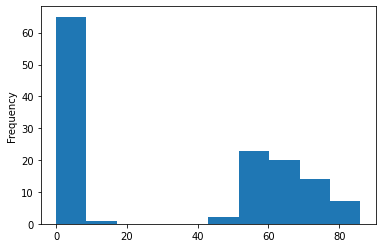

In [59]:
innr['age-at-heart-attack'].plot(kind='hist') #The distribution pattern within age of attack are skew right, meaning most age are with upper positive branch.

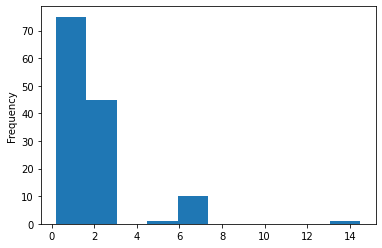

In [60]:
innr['pericardial-effusion'].plot(kind='hist') #These value would be more skew left, with negative branch.

## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- Interpret and explain the two t-tests you ran - what do they tell you about the relationships between the continuous features you selected and the class labels?
- Interpret and explain the two Chi-squared tests you ran - what do they tell you about the relationships between the categorical features you selected and the class labels?
- What was the most challenging part of this sprint challenge?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

The 

The t-test completed for the two data sample group can be utilized to compare means, and analyze data outcomes. The test p-value can be utilized to justify an observed hypothesis. For example the first test group pertain to rather age is significant contributing factor to heart attack occurrence. Based on the test conducted and p-value it was safe to say that age does have a significant role within heart attack occurrence. Therefore, the hypothesis may not be rejected. There was also a sample-t test conducted that enable there to be sample comparison. The sample comparison is nessary to analyze data patterns, and distributions.

However, our second sample T-test, and T-test indicates that we wall motion score doesn't have significant role within heart-attacks. There was a p-value above 0.05. The two-tail test did indicate that there is a significant influence within the wall-motion-score. Although, the confidence level were not present. Confidence level indicates the percentage of validity, or how sure it can be stated that p-value is in support of of the null hypothesis.

The Chi-Square test are there to evaluate categorical data. In this test it was observed if age, and pericardial effusion have a direct relations to one another. Based on the test statistics of the chi-square and contingency, the p-value indicates that this hypothesis can be accepted.

## Part 4 - Bayesian vs Frequentist Statistics

Using a minimum of 2-3 sentences, give an explanation of Bayesian and Frequentist statistics, and then compare and contrast these two approaches to statistical inference.



Bayesian and Frequentist statistics are based on the observation of data occurrence that are connected to understanding probability. These are method of statisics that can be utilized observe data patterns that pertains to the frequency of outcomes. This enable analyst to be able to make statiscal predictions.

Bayesian pertains to the observation of confidence levels, while Frequentists statistics are based on distribution and frequency. They vary in the application of function, for example Bayesian utilizes fractions, and positive and negative factors to calculate probability of occurrence.


# Stretch Goals: 
Do these to get a 3. These are not required in order to pass the Sprint Challenge.

## Part 1: 

Make sure that all of your dataframe columns have the appropriate data types. *Hint:* If a column has the datatype of "object" even though it's made up of float or integer values, you can coerce it to act as a numeric column by using the `pd.to_numeric()` function. In order to get a 3 on this section make sure that your data exploration is particularly well commented, easy to follow, and thorough.

## Part 2:

Write functions that can calculate t-tests and chi^2 tests on all of the appropriate column combinations from the dataset. (Remember that certain tests require certain variable types.)

## Part 3: 

Calculate and report confidence intervals on your most important mean estimates (choose at least two). Make some kind of a graphic or visualization to help us see visually how precise these estimates are.

## Part 4:

Give an extra awesome explanation of Bayesian vs Frequentist Statistics. Maybe use code or visualizations, or any other means necessary to show an above average grasp of these high level concepts.

In [ ]:
# You can work the stretch goals down here or back up in their regular sections
# just make sure that they are labeled so that we can easily differentiate
# your main work from the stretch goals.